# Hey there! Welcome to my project on YouTube trends in Singapore. We're going to explore what Singaporeans like on YouTube and how it's changed over time. We'll use cool tools like web scraping with Selenium and Beautiful Soup, and some fancy statistics to gather and analyze data on what people are watching. Our goal is to present our findings in a fun and engaging way that shows how the YouTube landscape in Singapore is evolving. Let's get started!



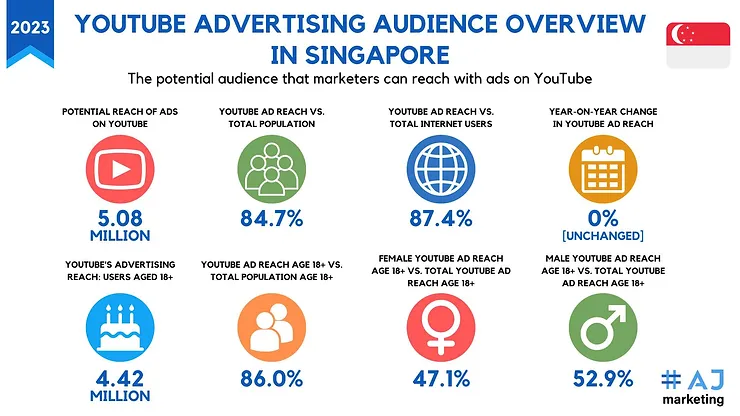

## As YouTube has the ability to influence 84.7% of our population, it is evident that it plays a significant role in the entertainment landscape of Singapore. Therefore, let us delve into the YouTube community and its characteristics.

In [42]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from bs4 import BeautifulSoup
from selenium.webdriver.common.action_chains import ActionChains
from selenium import webdriver
import time
from selenium.webdriver.common.by import By
from datetime import datetime, timedelta
import mpld3
import os
import json
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
import spacy
import keras
from keras.models import Sequential
from keras.layers import Dense
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import joblib
from sklearn.metrics import confusion_matrix, classification_report

### Lets choose 10 popular youtubers in Singapore
[List of popular youtubers](https://www.ajmarketing.io/post/top-20-youtubers-singapore-2021)


In [2]:
youtubers={
    'JianHao Tan':'https://www.youtube.com/@jianhao/videos',
    'Doctor Tristan Peh':'https://www.youtube.com/@DoctorTristanPeh/videos',
    'JJ Lin林俊傑':'https://www.youtube.com/@jjlin/videos',
    'Wah!Banana':'https://www.youtube.com/@wahbanana/videos',
    'Peggie Neo':'https://www.youtube.com/@PeggieNeo/videos',
    'JEBBEY FAMILY':'https://www.youtube.com/@jebbey/videos',
    'Adam Khoo':'https://www.youtube.com/@AdamKhoo/videos',
    'SuperPrincessjo':'https://www.youtube.com/@SuperPrincessjo/videos',
    'Dharni':'https://www.youtube.com/@Dharni/videos',
    'TiffwithMi':'https://www.youtube.com/@TiffwithMi/videos'
}

### Lets get the number of subscribers for each youtuber



In [11]:
sub_count_list=[]
for youtuber in youtubers:
    # URL of the YouTube video to be parsed
    url = youtubers[youtuber]
    # Create a new instance of the Chrome driver
    driver = webdriver.Chrome()
    # Load the web page
    driver.get(url)
    time.sleep(5)
    # Get the page source
    html = driver.page_source
    time.sleep(1)
    # Close the driver
    driver.quit()

    # Parse the HTML content with Beautiful Soup
    soup = BeautifulSoup(html, 'html.parser')

    # Find the title of the video and print it
    num_of_subs = soup.find('ytd-app')\
                    .find('div', id='content')\
                    .find('ytd-page-manager', id='page-manager')\
                    .find('ytd-browse')\
                    .find('div', id='header')\
                    .find('ytd-c4-tabbed-header-renderer')\
                    .find('tp-yt-app-header-layout')\
                    .find('div', id='wrapper')\
                    .find('tp-yt-app-header',id='header')\
                    .find('div', id='contentContainer')\
                    .find('div', id='channel-container')\
                    .find('div', id='channel-header')\
                    .find('div', id='channel-header-container')\
                    .find('div', id='inner-header-container')\
                    .find('div', id='meta')\
                    .find('yt-formatted-string', id='subscriber-count').text
    sub_count_list.append(num_of_subs)
    print(num_of_subs)
    


6.29M subscribers
3.51M subscribers
1.45M subscribers
1.28M subscribers
1.07M subscribers
1.01M subscribers
924K subscribers
859K subscribers
766K subscribers
709K subscribers


### Lets standardise the number of subscribers to be in terms of thousands

In [12]:
processed_sub_count=[]
for sub_count in sub_count_list:
    num_of_subs = sub_count.replace("subscribers", "").strip()
    if len(num_of_subs) == 5:
        num_of_subs = float(num_of_subs[:4]) * 1000
        processed_sub_count.append(num_of_subs)
    elif len(num_of_subs) == 4:
        num_of_subs = int(num_of_subs[:3])
        processed_sub_count.append(num_of_subs)
    else:
        # handle unexpected subscriber count formats or invalid input
        pass
     
        
    
sub_count = pd.DataFrame({'youtuber': youtubers.keys(), 'subscriber count': processed_sub_count})

sub_count.head(10)

,youtuber,subscriber count
0,JianHao Tan,6290.0
1,Doctor Tristan Peh,3510.0
2,JJ Lin林俊傑,1450.0
3,Wah!Banana,1280.0
4,Peggie Neo,1070.0
5,JEBBEY FAMILY,1010.0
6,Adam Khoo,924.0
7,SuperPrincessjo,859.0
8,Dharni,766.0
9,TiffwithMi,709.0


In [13]:
#lets save this data
sub_count.to_csv('sub_count.csv')

In [46]:
#Lets get the data back 
sub_count=pd.read_csv('sub_count.csv')

C:\Users\lawre\anaconda3\envs\SingaTrend\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26519 (\N{CJK UNIFIED IDEOGRAPH-6797}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lawre\anaconda3\envs\SingaTrend\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20426 (\N{CJK UNIFIED IDEOGRAPH-4FCA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\lawre\anaconda3\envs\SingaTrend\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 20625 (\N{CJK UNIFIED IDEOGRAPH-5091}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


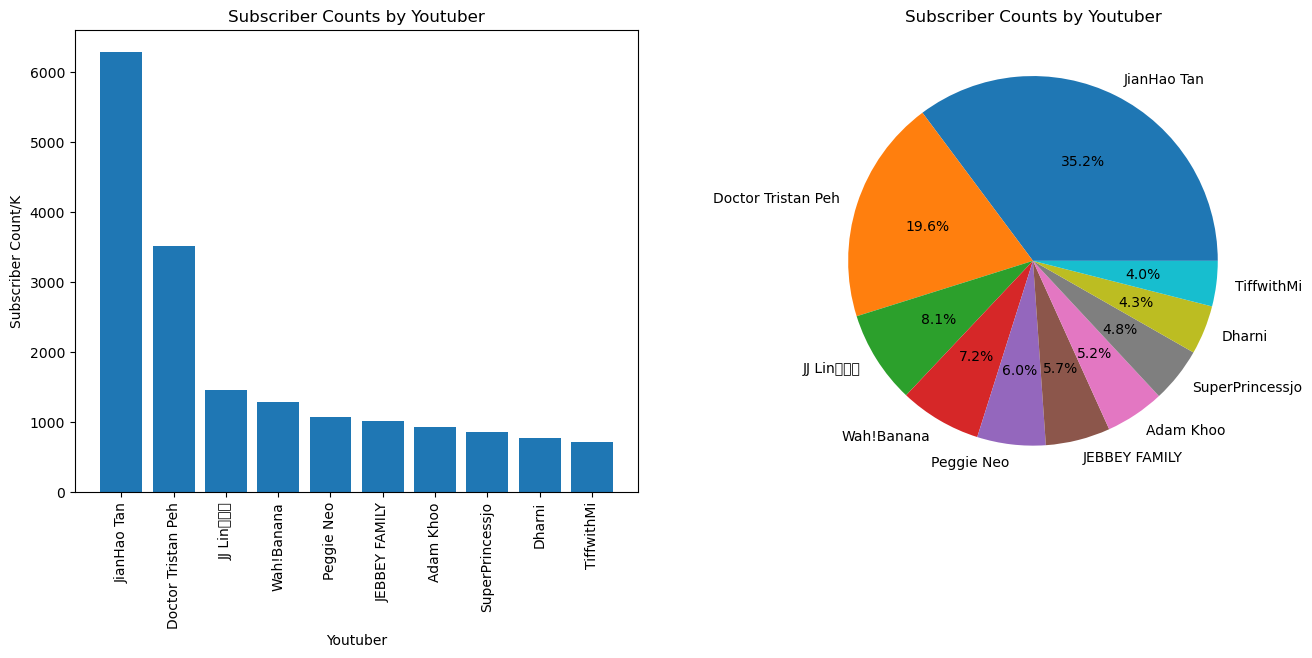

In [14]:
# Calculate the total subscriber count
total_subs = sub_count['subscriber count'].sum()

# Calculate the percentage of each channel's subscriber count
sub_count['percent'] = sub_count['subscriber count'] / total_subs * 100

# Create the bar chart
fig, ax = plt.subplots(1, 2, figsize=(16, 6))  # create a figure with two subplots side by side
ax[0].bar(sub_count['youtuber'], sub_count['subscriber count'])  # plot the bar chart in the first subplot
ax[0].set_xlabel('Youtuber')
ax[0].set_ylabel('Subscriber Count/K')
ax[0].set_title('Subscriber Counts by Youtuber')
ax[0].tick_params(axis='x', labelrotation=90)  # rotate x-axis labels by 90 degrees

# Create the pie chart
ax[1].pie(sub_count['percent'], labels=sub_count['youtuber'], autopct='%1.1f%%')  # plot the pie chart in the second subplot
ax[1].set_title('Subscriber Counts by Youtuber')

# Show the plot
plt.show()

### Lets webscrape youtube


In [27]:


def get_title_views_time_ago(name):
    vid_title=[]
    vid_num_of_views=[]
    vid_time_ago=[]
    print(name)
    url = youtubers[name]
    # Create a new instance of the Chrome driver
    driver = webdriver.Chrome()

    # Load the web page
    driver.get(url)

    
    rows = driver.find_elements(By.XPATH,'//ytd-rich-grid-row')

    # Get the current number of rows
    num_rows = len(rows)
    print(num_rows)

    # Simulate scrolling down the page slowly and more precisely
    while True:
        # Move the cursor to the last row
        
        driver.execute_script("arguments[0].scrollIntoView();", rows[-1])
        # Wait for the page to load
        time.sleep(5)

        # Check if any new rows have been added
        
        rows = driver.find_elements(By.XPATH,'//ytd-rich-grid-row')
        new_num_rows = len(rows)
        if new_num_rows == num_rows:
            break
        num_rows = new_num_rows

    # Get the page source
    html = driver.page_source

    # Close the driver
    driver.quit()

    # Parse the HTML content with Beautiful Soup
    soup = BeautifulSoup(html, 'html.parser')

    # Find the list of videos on the page
    rows = soup.find('ytd-app') \
        .find('div', id='content') \
        .find('ytd-page-manager', id='page-manager') \
        .find('ytd-browse') \
        .find('ytd-two-column-browse-results-renderer') \
        .find('div', id='primary') \
        .find('ytd-rich-grid-renderer') \
        .find('div', id='contents') \
        .find_all('ytd-rich-grid-row')

    for row in rows:
       
        videos=row.find('div',id='contents').find_all('ytd-rich-item-renderer')
      
        for video in videos:
            title=video.find('div',id='content')\
            .find('ytd-rich-grid-media')\
            .find('div',id='dismissible')\
            .find('div',id='details')\
            .find('div',id='meta')\
            .find('h3')\
            .find('a',id='video-title-link')\
            .find('yt-formatted-string').text
            
            vid_title.append(title)
            views_time_ago=video.find('div',id='content')\
            .find('ytd-rich-grid-media')\
            .find('div',id='dismissible')\
            .find('div',id='details')\
            .find('div',id='meta')\
            .find('ytd-video-meta-block')\
            .find('div',id='metadata')\
            .find('div',id='metadata-line')\
            .find_all('span')
            views=views_time_ago[0].text
            vid_num_of_views.append(views)
            time_ago=views_time_ago[1].text
            vid_time_ago.append(time_ago)
    print('DONE')
    return pd.DataFrame({'title': vid_title, 'views': vid_num_of_views , 'time_ago': vid_time_ago})

### We also need to clean and transform the data we gotten

In [24]:
def clean_views(val):
    if 'waiting' in val:
        return 0
    val = val.replace('views', '').strip()
    if val[-1]=='M':  # check if the last character is a string
        val = float(val[:-1])
        val=float(val)*1000
    else:
        val = float(val[:-1])
        val = float(val)
    return val
    

In [25]:
def clean_time_ago(val):
    current_date = datetime.now()

    if 'day' in val:
        num_days = int(val.split()[0])
        new_date = current_date - timedelta(days=num_days)
    elif 'week' in val:
        num_weeks = int(val.split()[0])
        new_date = current_date - timedelta(days=num_weeks*7)
    elif 'month' in val:
        num_months = int(val.split()[0])
        new_date = current_date - timedelta(days=num_months*30)
    elif 'year' in val:
        num_years = int(val.split()[0])
        new_date = current_date - timedelta(days=num_years*365)
    else:
        return None

    return new_date

In [2]:
jianhao_tan=get_title_views_time_ago('JianHao Tan')
jianhao_tan['views']=jianhao_tan['views'].apply(clean_views)
jianhao_tan['date']=jianhao_tan['time_ago'].apply(clean_time_ago)
jianhao_tan = jianhao_tan.drop('time_ago', axis=1)
jianhao_tan['year'] = jianhao_tan['date'].dt.year

doctor_tristan_peh=get_title_views_time_ago('Doctor Tristan Peh')
doctor_tristan_peh['views'] = doctor_tristan_peh['views'].apply(clean_views)
doctor_tristan_peh['date'] = doctor_tristan_peh['time_ago'].apply(clean_time_ago)
doctor_tristan_peh = doctor_tristan_peh.drop('time_ago', axis=1)
doctor_tristan_peh['year'] = doctor_tristan_peh['date'].dt.year

jj_lin=get_title_views_time_ago('JJ Lin林俊傑')
jj_lin['views'] = jj_lin['views'].apply(clean_views)
jj_lin['date'] = jj_lin['time_ago'].apply(clean_time_ago)
jj_lin = jj_lin.drop('time_ago', axis=1)
jj_lin['year'] = jj_lin['date'].dt.year

wah_banana=get_title_views_time_ago('Wah!Banana')
wah_banana['views'] = wah_banana['views'].apply(clean_views)
wah_banana['date'] = wah_banana['time_ago'].apply(clean_time_ago)
wah_banana = wah_banana.drop('time_ago', axis=1)
wah_banana['year'] = wah_banana['date'].dt.year

peggie_neo=get_title_views_time_ago('Peggie Neo')
peggie_neo['views'] = peggie_neo['views'].apply(clean_views)
peggie_neo['date'] = peggie_neo['time_ago'].apply(clean_time_ago)
peggie_neo = peggie_neo.drop('time_ago', axis=1)
peggie_neo['year'] = peggie_neo['date'].dt.year

jebbey_family=get_title_views_time_ago('JEBBEY FAMILY')
jebbey_family['views'] = jebbey_family['views'].apply(clean_views)
jebbey_family['date'] = jebbey_family['time_ago'].apply(clean_time_ago)
jebbey_family = jebbey_family.drop('time_ago', axis=1)
jebbey_family['year'] = jebbey_family['date'].dt.year

adam_khoo=get_title_views_time_ago('Adam Khoo')
adam_khoo['views'] = adam_khoo['views'].apply(clean_views)
adam_khoo['date'] = adam_khoo['time_ago'].apply(clean_time_ago)
adam_khoo = adam_khoo.drop('time_ago', axis=1)
adam_khoo['year'] = adam_khoo['date'].dt.year

super_princess_jo=get_title_views_time_ago('SuperPrincessjo')
super_princess_jo['views'] = super_princess_jo['views'].apply(clean_views)
super_princess_jo['date'] = super_princess_jo['time_ago'].apply(clean_time_ago)
super_princess_jo = super_princess_jo.drop('time_ago', axis=1)
super_princess_jo['year'] = super_princess_jo['date'].dt.year

dharni=get_title_views_time_ago('Dharni')
dharni['views'] = dharni['views'].apply(clean_views)
dharni['date'] = dharni['time_ago'].apply(clean_time_ago)
dharni = dharni.drop('time_ago', axis=1)
dharni['year'] = dharni['date'].dt.year

tiff_with_mi=get_title_views_time_ago('TiffwithMi')
tiff_with_mi['views'] = tiff_with_mi['views'].apply(clean_views)
tiff_with_mi['date'] = tiff_with_mi['time_ago'].apply(clean_time_ago)
tiff_with_mi = tiff_with_mi.drop('time_ago', axis=1)
tiff_with_mi['year'] = tiff_with_mi['date'].dt.year

### Lets save the datasets so we can just import them if needed

In [29]:
jianhao_tan.to_csv('jianhao_tan.csv')
doctor_tristan_peh.to_csv('doctor_tristan_peh.csv')
jj_lin.to_csv('jj_lin.csv')
wah_banana.to_csv('wah_banana.csv')
peggie_neo.to_csv('peggie_neo.csv')
jebbey_family.to_csv('jebbey_family.csv')
adam_khoo.to_csv('adam_khoo.csv')
super_princess_jo.to_csv('super_princess_jo.csv')
dharni.to_csv('dharni.csv')
tiff_with_mi.to_csv('tiff_with_mi.csv')

In [7]:
#Get the datasets back
jianhao_tan = pd.read_csv('youtubers datasets/jianhao_tan.csv')
doctor_tristan_peh = pd.read_csv('youtubers datasets/doctor_tristan_peh.csv')
jj_lin = pd.read_csv('youtubers datasets/jj_lin.csv')
wah_banana = pd.read_csv('youtubers datasets/wah_banana.csv')
peggie_neo = pd.read_csv('youtubers datasets/peggie_neo.csv')
jebbey_family = pd.read_csv('youtubers datasets/jebbey_family.csv')
adam_khoo = pd.read_csv('youtubers datasets/adam_khoo.csv')
super_princess_jo = pd.read_csv('youtubers datasets/super_princess_jo.csv')
dharni = pd.read_csv('youtubers datasets/dharni.csv')
tiff_with_mi = pd.read_csv('youtubers datasets/tiff_with_mi.csv')




In [120]:
views_by_year_jianhao_tan = jianhao_tan.groupby('year')['views'].sum()
views_by_year_jianhao_tan = views_by_year_jianhao_tan.reset_index()
views_by_year_doctor_tristan_peh = doctor_tristan_peh.groupby('year')['views'].sum()
views_by_year_doctor_tristan_peh = views_by_year_doctor_tristan_peh.reset_index()
views_by_year_jj_lin = jj_lin.groupby('year')['views'].sum()
views_by_year_jj_lin = views_by_year_jj_lin.reset_index()
views_by_year_wah_banana = wah_banana.groupby('year')['views'].sum()
views_by_year_wah_banana = views_by_year_wah_banana.reset_index()
views_by_year_peggie_neo = peggie_neo.groupby('year')['views'].sum()
views_by_year_peggie_neo = views_by_year_peggie_neo.reset_index()
views_by_year_jebbey_family = jebbey_family.groupby('year')['views'].sum()
views_by_year_jebbey_family = views_by_year_jebbey_family.reset_index()
views_by_year_adam_khoo = adam_khoo.groupby('year')['views'].sum()
views_by_year_adam_khoo = views_by_year_adam_khoo.reset_index()
views_by_year_super_princess_jo = super_princess_jo.groupby('year')['views'].sum()
views_by_year_super_princess_jo = views_by_year_super_princess_jo.reset_index()
views_by_year_dharni = dharni.groupby('year')['views'].sum()
views_by_year_dharni = views_by_year_dharni.reset_index()
views_by_year_tiff_with_mi = tiff_with_mi.groupby('year')['views'].sum()
views_by_year_tiff_with_mi = views_by_year_tiff_with_mi.reset_index()


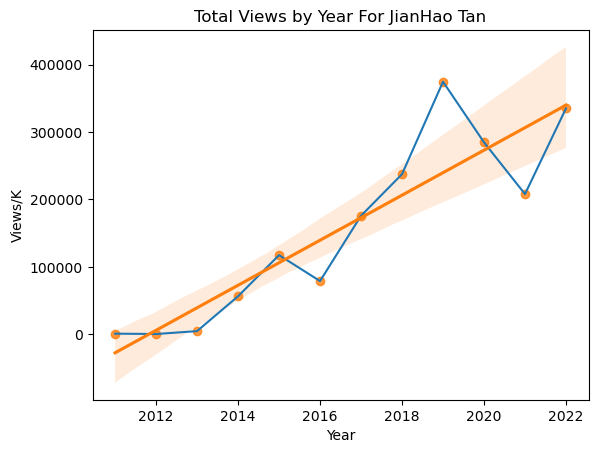

In [32]:


# Plot the line graph
sns.lineplot(x='year', y='views', data=views_by_year_jianhao_tan.query('year != 2023'))
# Add a trend line
sns.regplot(x='year', y='views', data=views_by_year_jianhao_tan.query('year != 2023'))
# Set the plot title and labels
plt.title('Total Views by Year For JianHao Tan')
plt.xlabel('Year')
plt.ylabel('Views/K')

# Display the plot
plt.show()

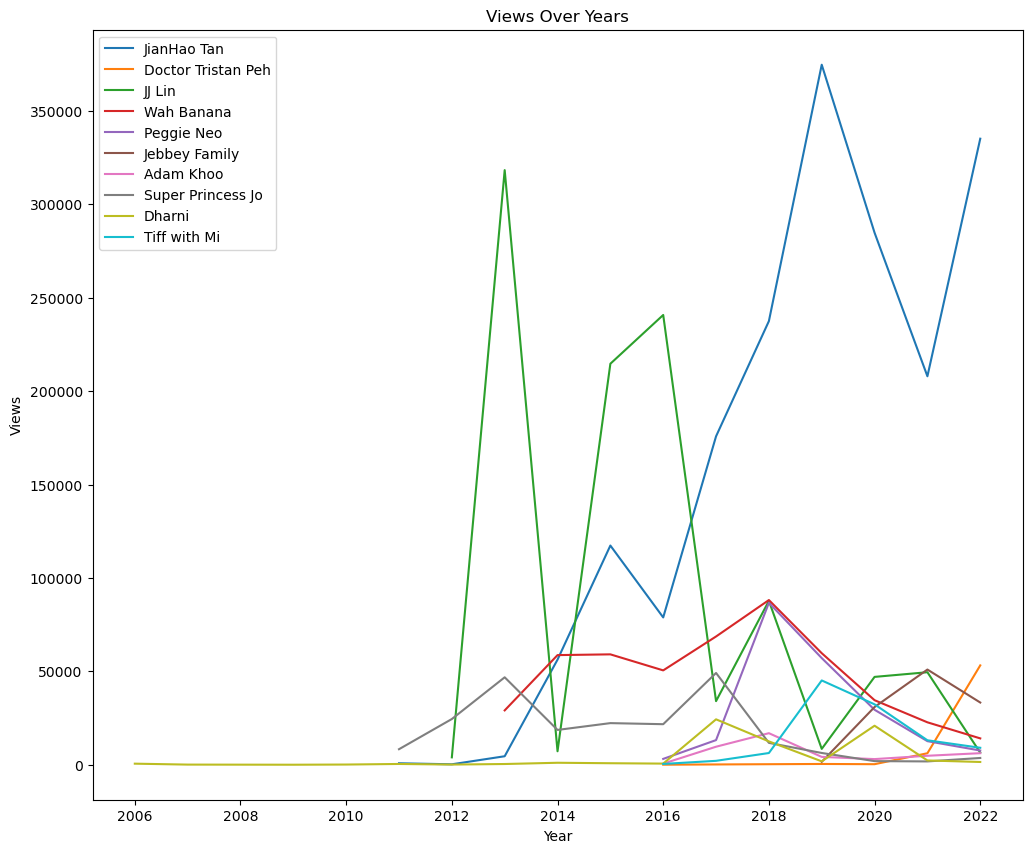

In [33]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 10))


# Plot the first dataset
ax.plot(views_by_year_jianhao_tan[views_by_year_jianhao_tan['year'] != 2023]['year'], 
        views_by_year_jianhao_tan[views_by_year_jianhao_tan['year'] != 2023]['views'], 
        label='JianHao Tan')

# Plot the second dataset
ax.plot(views_by_year_doctor_tristan_peh[views_by_year_doctor_tristan_peh['year'] != 2023]['year'], 
        views_by_year_doctor_tristan_peh[views_by_year_doctor_tristan_peh['year'] != 2023]['views'], 
        label='Doctor Tristan Peh')

# Plot the third dataset
ax.plot(views_by_year_jj_lin[views_by_year_jj_lin['year'] != 2023]['year'], 
        views_by_year_jj_lin[views_by_year_jj_lin['year'] != 2023]['views'], 
        label='JJ Lin')

# Add more plot statements for the remaining datasets
ax.plot(views_by_year_wah_banana[views_by_year_wah_banana['year'] != 2023]['year'], 
        views_by_year_wah_banana[views_by_year_wah_banana['year'] != 2023]['views'], 
        label='Wah Banana')
ax.plot(views_by_year_peggie_neo[views_by_year_peggie_neo['year'] != 2023]['year'], 
        views_by_year_peggie_neo[views_by_year_peggie_neo['year'] != 2023]['views'], 
        label='Peggie Neo')
ax.plot(views_by_year_jebbey_family[views_by_year_jebbey_family['year'] != 2023]['year'], 
        views_by_year_jebbey_family[views_by_year_jebbey_family['year'] != 2023]['views'], 
        label='Jebbey Family')
ax.plot(views_by_year_adam_khoo[views_by_year_adam_khoo['year'] != 2023]['year'], 
        views_by_year_adam_khoo[views_by_year_adam_khoo['year'] != 2023]['views'], 
        label='Adam Khoo')
ax.plot(views_by_year_super_princess_jo[views_by_year_super_princess_jo['year'] != 2023]['year'], 
        views_by_year_super_princess_jo[views_by_year_super_princess_jo['year'] != 2023]['views'], 
        label='Super Princess Jo')
ax.plot(views_by_year_dharni[views_by_year_dharni['year'] != 2023]['year'], 
        views_by_year_dharni[views_by_year_dharni['year'] != 2023]['views'], 
        label='Dharni')
ax.plot(views_by_year_tiff_with_mi[views_by_year_tiff_with_mi['year'] != 2023]['year'], 
        views_by_year_tiff_with_mi[views_by_year_tiff_with_mi['year'] != 2023]['views'], 
        label='Tiff with Mi')


# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Views')
ax.set_title('Views Over Years')
ax.legend()

# Show the plot
plt.show()

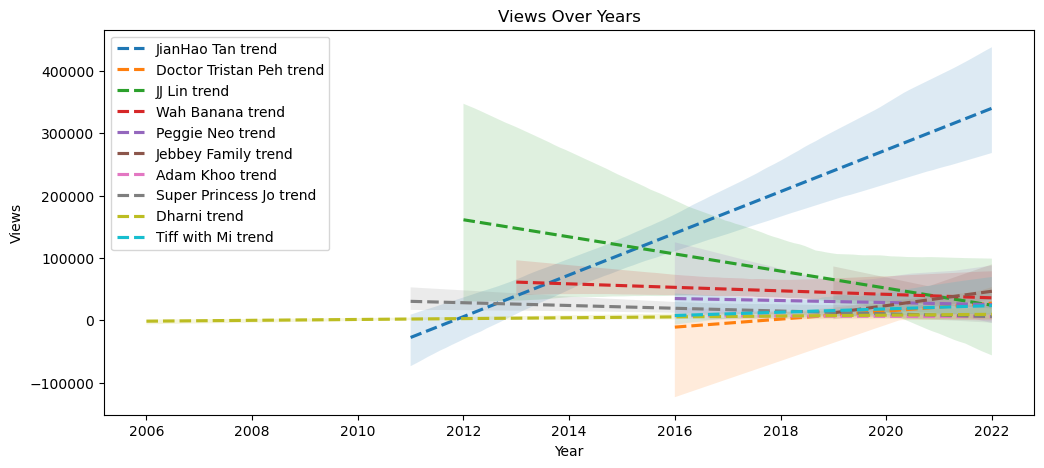

In [121]:
# Create a figure and axes
fig, ax = plt.subplots(figsize=(12, 5))


# Plot the first dataset

sns.regplot(
    x='year',
    y='views',
    data=views_by_year_jianhao_tan[views_by_year_jianhao_tan['year'] != 2023],
    ax=ax,
    label='JianHao Tan trend',
    line_kws={'linestyle': '--'},
    scatter=False
)
# Plot the second dataset

sns.regplot(
    x='year',
    y='views',
    data=views_by_year_doctor_tristan_peh[views_by_year_doctor_tristan_peh['year'] != 2023],
    ax=ax,
    label='Doctor Tristan Peh trend',
    line_kws={'linestyle': '--'},
    scatter=False
)
# Plot the third dataset

sns.regplot(
    x='year',
    y='views',
    data=views_by_year_jj_lin[views_by_year_jj_lin['year'] != 2023],
    ax=ax,
    label='JJ Lin trend',
    line_kws={'linestyle': '--'},
    scatter=False
)
# Add more plot statements for the remaining datasets

sns.regplot(
    x='year',
    y='views',
    data=views_by_year_wah_banana[views_by_year_wah_banana['year'] != 2023],
    ax=ax,
    label='Wah Banana trend',
    line_kws={'linestyle': '--'},
    scatter=False
)


sns.regplot(
    x='year',
    y='views',
    data=views_by_year_peggie_neo[views_by_year_peggie_neo['year'] != 2023],
    ax=ax,
    label='Peggie Neo trend',
    line_kws={'linestyle': '--'},
    scatter=False
)

sns.regplot(
    x='year',
    y='views',
    data=views_by_year_jebbey_family[views_by_year_jebbey_family['year'] != 2023],
    ax=ax,
    label='Jebbey Family trend',
    line_kws={'linestyle': '--'},
    scatter=False
)


sns.regplot(
    x='year',
    y='views',
    data=views_by_year_adam_khoo[views_by_year_adam_khoo['year'] != 2023],
    ax=ax,
    label='Adam Khoo trend',
    line_kws={'linestyle': '--'},
    scatter=False
)


sns.regplot(
    x='year',
    y='views',
    data=views_by_year_super_princess_jo[views_by_year_super_princess_jo['year'] != 2023],
    ax=ax,
    label='Super Princess Jo trend',
    line_kws={'linestyle': '--'},
    scatter=False
)

sns.regplot(
    x='year',
    y='views',
    data=views_by_year_dharni[views_by_year_dharni['year'] != 2023],
    ax=ax,
    label='Dharni trend',
    line_kws={'linestyle': '--'},
    scatter=False
)



sns.regplot(
    x='year',
    y='views',
    data=views_by_year_tiff_with_mi[views_by_year_tiff_with_mi['year'] != 2023],
    ax=ax,
    label='Tiff with Mi trend',
    line_kws={'linestyle': '--'},
    scatter=False
)

# Customize the plot
ax.set_xlabel('Year')
ax.set_ylabel('Views')
ax.set_title('Views Over Years')
ax.legend()

# Show the plot
plt.show()

### Now lets train a machine learning model to predict a video's category based on its title 


In [21]:
#We are going to be using the data from US, California and Great Britian

# Define the relative file path
us_file_path = 'youtube dataset\\archive\\USvideos.csv'
# Read the CSV file into a pandas DataFrame
us = pd.read_csv(us_file_path)
us_filtered=us[['title','category_id']]

# Define the relative file path
ca_file_path = 'youtube dataset\\archive\\CAvideos.csv'
# Read the CSV file into a pandas DataFrame
ca = pd.read_csv(ca_file_path)
ca_filtered=ca[['title','category_id']]

# Define the relative file path
gb_file_path = 'youtube dataset\\archive\\GBvideos.csv'
# Read the CSV file into a pandas DataFrame
gb = pd.read_csv(gb_file_path)
gb_filtered=gb[['title','category_id']]

#combine the dataset
data = pd.concat([us_filtered, ca_filtered, gb_filtered], axis=0)

#shuffle the dataset
data = data.sample(frac=1, random_state=42)

# Reset the index of the combined dataset
data = data.reset_index(drop=True)



data.head()

,title,category_id
0,HomePod — Welcome Home by Spike Jonze — Apple,28
1,When You Meet Your Ex's New Girlfriend (ft. Ka...,23
2,GOD LEVEL Street Food in Mexico 2.0 | MONSTER ...,19
3,The Mooch | Real Time with Bill Maher (HBO),1
4,"Real Reason, Why Anthony Bourdain Took His Own...",22


In [20]:
#Lets get the category name

# Specify the file path to the JSON file
file_path = 'youtube dataset\\archive\\US_category_id.json'

# Open the JSON file and load its contents
with open(file_path, 'r') as json_file:
    contents = json.load(json_file)

# Now you can work with the data as a Python object
# For example, you can access specific fields or iterate over the data
items = contents['items']
category_id=[]
category_name=[]
for item in items:
    category_id.append(item['id'])
    category_name.append(item['snippet']['title'])

categories= pd.DataFrame({'category_id': category_id, 'category_name': category_name})
categories['category_id'] = categories['category_id'].astype('int64')
categories.tail()

,category_id,category_name
27,40,Sci-Fi/Fantasy
28,41,Thriller
29,42,Shorts
30,43,Shows
31,44,Trailers


In [23]:
data_full = data.merge(categories, on='category_id', how='left')
data_full.head()

,title,category_id,category_name
0,HomePod — Welcome Home by Spike Jonze — Apple,28,Science & Technology
1,When You Meet Your Ex's New Girlfriend (ft. Ka...,23,Comedy
2,GOD LEVEL Street Food in Mexico 2.0 | MONSTER ...,19,Travel & Events
3,The Mooch | Real Time with Bill Maher (HBO),1,Film & Animation
4,"Real Reason, Why Anthony Bourdain Took His Own...",22,People & Blogs


In [47]:
#lets save this data
data_full.to_csv('data_full.csv')

In [48]:
#Lets get the data back 
data_full=pd.read_csv('data_full.csv')

In [30]:

# Load Spacy language model
nlp = spacy.load('en_core_web_sm')

# Example dataset
titles = data_full['title']
categories = data_full['category_name']

# Text preprocessing and vectorization
corpus = []
for title in tqdm(titles, desc="Processing corpus"):
    # Tokenization and lemmatization
    tokens = [token.lemma_ for token in nlp(title)]
    preprocessed_title = ' '.join(tokens)
    corpus.append(preprocessed_title)







Processing corpus: 100%|███████████████████████████████████████████████████████| 120746/120746 [39:47<00:00, 50.57it/s]


In [35]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(corpus, categories, test_size=0.2, random_state=42)
print("Done")
# Vectorize the preprocessed titles using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
print("Done")
# Train a logistic regression model
model = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=10000)
model.fit(X_train_vectorized, y_train)
print("Done")

Done
Done
Done
Done


In [38]:
# Save the trained model to a file
joblib.dump(model, 'logistic_regression_model.pkl')


['logistic_regression_model.pkl']

In [39]:
# Load the saved model from file
model = joblib.load('logistic_regression_model.pkl')

In [40]:
# Predict on the test set
y_pred = model.predict(X_test_vectorized)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8847204968944099


In [45]:
# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Generate classification report
report = classification_report(y_test, y_pred ,zero_division=1)
print("Classification Report:")
print(report)


Confusion Matrix:
[[ 123    3    0   37    0    0    5    0    3    3    0    5    0    2
     0    2    0]
 [   0 1523    9  188    5    2   12    0   38   23    0   35    1    4
     0    8    2]
 [   0    8  501   86    3    0    5    0    5   11    0   16    0    2
     0    0    0]
 [   0   68    9 6070   19   10   36    0   81   69    0   89    7    7
     1   17    0]
 [   0    9    4  130 1198    0    7    0   15    9    0   18    0    6
     0    2    0]
 [   0    7    4   83    5  685    8    0    4    3    0   12    0    3
     0    6    0]
 [   0   13    1   85    1    0 1409    0    4    8    0   21    1    4
     0    2    1]
 [   0    0    0    1    0    0    0    0    0    0    0    0    0    0
     0    0    0]
 [   0    5    2   86    7    0    1    0 4642    6    0   14    0    1
     0    2    0]
 [   0   24    4  196    2    3    6    0   16 1264    0   27    0    7
     0    2    0]
 [   0    1    0   17    0    0    0    0    0    4   28    1    0    0
     0    

### Model is looking good lets use it to predict the labels for our Singaporean Youtubers


In [56]:
# Concatenate the datasets
singaporean_youtubers = pd.concat([jianhao_tan, doctor_tristan_peh, jj_lin, wah_banana, peggie_neo,
                                  jebbey_family, adam_khoo, super_princess_jo, dharni, tiff_with_mi])

# Reset the index
singaporean_youtubers.reset_index(drop=True, inplace=True)

# Save the combined dataset to a CSV file
singaporean_youtubers.to_csv('singaporean_youtubers.csv',index=False)

In [57]:
singaporean_youtubers=pd.read_csv('singaporean_youtubers.csv')

In [58]:
singaporean_youtubers.head()

,Unnamed: 0,title,views,date,year
0,0,12 Types of People on Pay Day,406.0,NaN,NaN
1,1,13 Types of Students in a Science Fair,1300.0,2023-05-29 19:30:26.496087,2023.0
2,2,9 Types of Students in a Group Project,1200.0,2023-05-22 19:30:26.496087,2023.0
3,3,13 Types of Students Getting Exam Results,1800.0,2023-05-15 19:30:26.496087,2023.0
4,4,13 Types of Students During an Exam,1400.0,2023-05-13 19:30:26.496087,2023.0


In [67]:
#remove rows with blanks
singaporean_youtubers_cleaned = singaporean_youtubers.dropna()

In [68]:
sg_vectorized = vectorizer.transform(singaporean_youtubers_cleaned['title'])
sg_pred = model.predict(sg_vectorized)

In [69]:
sg_filtered = singaporean_youtubers_cleaned[['title','views','year']].copy()

In [70]:
sg_filtered['category']=sg_pred

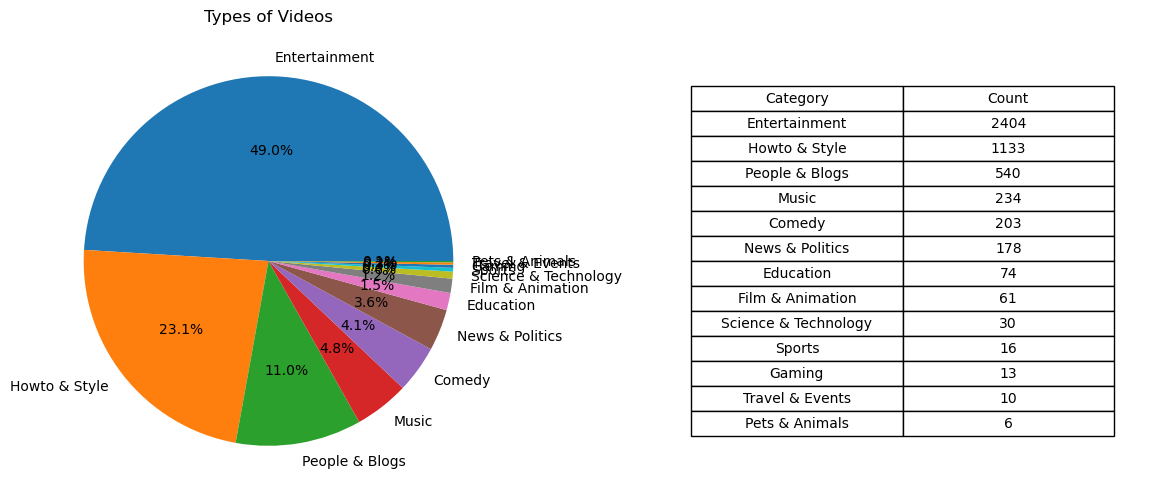

In [89]:
# Calculate the count of each category
category_counts = sg_filtered['category'].value_counts()

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot the pie chart
ax1.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
ax1.set_title('Types of Videos')

# Create the table
table_data = [[category, count] for category, count in zip(category_counts.index, category_counts)]
table = ax2.table(cellText=table_data, colLabels=['Category', 'Count'], loc='center', cellLoc='center')

# Set table properties
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(0.8, 1.5)

# Remove axis labels and ticks from the table subplot
ax2.axis('off')

plt.show()


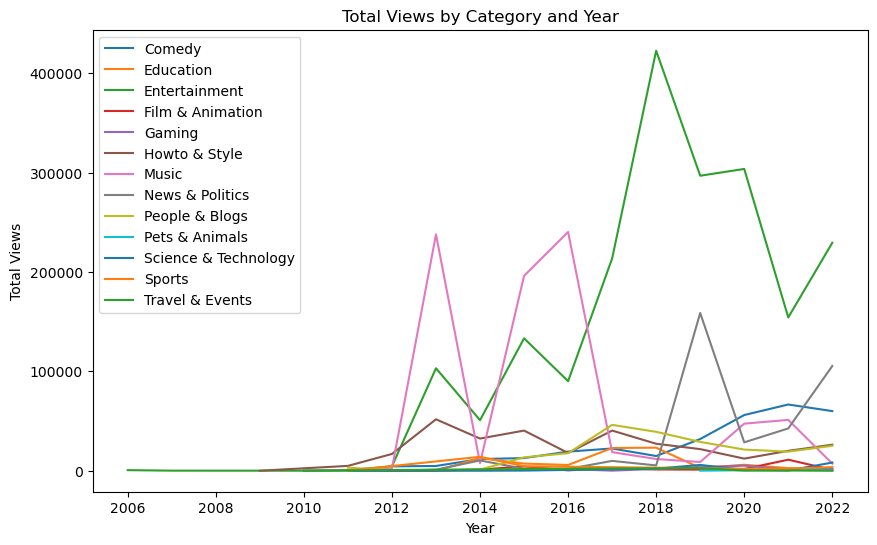

In [102]:
# Filter out the year 2023
filtered_data = sg_filtered[sg_filtered['year'] != 2023]

# Group the filtered data by category and year, and calculate the sum of views
category_views = filtered_data.groupby(['category', 'year'])['views'].sum().reset_index()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot a line for each category with labels
for category, data in category_views.groupby('category'):
    data.plot(x='year', y='views', ax=ax, label=category)

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('Total Views')

# Set the title
ax.set_title('Total Views by Category and Year')

# Add a legend
ax.legend()

# Show the plot
plt.show()


### Lets filter out the insignificant categories

In [108]:
# Assuming you have your data stored in a pandas DataFrame called 'df'
total_views_per_category = filtered_data.groupby('category')['views'].sum()
# Sort the total views per category in descending order
sorted_views_per_category = total_views_per_category.sort_values(ascending=False)
# Print the total views per category
print(sorted_views_per_category)

category
Entertainment           2003091.0
Music                    828976.4
News & Politics          365935.8
Howto & Style            311815.5
Comedy                   304630.8
People & Blogs           216232.2
Education                 86278.9
Sports                    26240.1
Film & Animation          25004.7
Science & Technology      17547.1
Gaming                     9599.0
Travel & Events            5088.0
Pets & Animals             1341.0
Name: views, dtype: float64


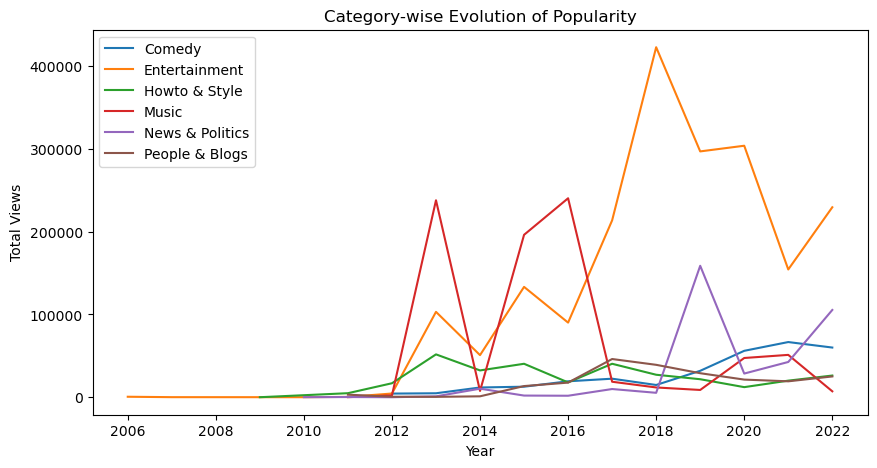

In [118]:
# Filter out the year 2023
filtered_data = sg_filtered[sg_filtered['year'] != 2023]
filtered_data = filtered_data[filtered_data['category'] != 'Pets & Animals']
filtered_data = filtered_data[filtered_data['category'] != 'Travel & Events']
filtered_data = filtered_data[filtered_data['category'] != 'Gaming']
filtered_data = filtered_data[filtered_data['category'] != 'Science & Technology']
filtered_data = filtered_data[filtered_data['category'] != 'Film & Animation']
filtered_data = filtered_data[filtered_data['category'] != 'Sports']
filtered_data = filtered_data[filtered_data['category'] != 'Education']
# Group the filtered data by category and year, and calculate the sum of views
category_views = filtered_data.groupby(['category', 'year'])['views'].sum().reset_index()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Plot a line for each category with labels
for category, data in category_views.groupby('category'):
    data.plot(x='year', y='views', ax=ax, label=category)

# Set the x-axis label
ax.set_xlabel('Year')

# Set the y-axis label
ax.set_ylabel('Total Views')

# Set the title
ax.set_title("Category-wise Evolution of Popularity")

# Add a legend
ax.legend()

# Show the plot
plt.show()

Using this graph we can see several trends 
1. Entertainment consistently emerges as the most popular category of videos, which is expected considering the significant presence of renowned Singaporean YouTubers such as JianHao Tan and WahBanana. Their focus on this category, particularly evident through their top 10 videos, contributes to its sustained popularity.

2. Furthermore, there is a noticeable upward trend in the popularity of news and politics content in recent years. This trend aligns with the growing concerns among the public regarding the dominance of the People's Action Party (PAP) in the Singapore Government. The increasing popularity of news and politics videos could be attributed to the active approach of opposition parties and the declining performance of the PAP in general elections.

3. The surge in popularity of comedy, particularly Singapore-themed comedy, could be a result of the escalating stress levels in Singapore caused by factors like job pressures and inflation. People seem to be seeking comedic relief as a means to alleviate stress in such circumstances.

Areas for improvement
1. Use a larger dataset
- Include a wider range of YouTubers, such as expanding the selection from 10 to 100, to capture a more diverse perspective
- Incorporate more varied types of videos to ensure that categories with fewer entries, like Pets & Animals, have a stronger presence.
2. Conduct a more detailed analysis, exploring factors like age and socioeconomic status, to gain deeper insights into the dynamics influencing video preferences and trends 
